# Лабораторная работа №2
## по предмету "оптимальное управление"
```
Выполнил: студент гр. А-14м-16 Мигаль И.А
Проверил: Зубков Павел Валерьевич
```

[Описание лабораторной работы](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/Opisanie_laboratornoi_774_raboty__2.pdf)

In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\elextom\\OneDrive\\Documents\\A-14m-16\\2CURSE3SEM\\optimal_control\\opt_ctrl_lab_2\\lab_2\\')
sys.path.insert(0, 'C:\\Users\\ivanm\\OneDrive\\Documents\\A-14m-16\\2CURSE3SEM\\optimal_control\\opt_ctrl_lab_2\\lab_2\\')
#print(sys.path)

In [2]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from matplotlib import colors as mcolors
import utils

from utils import array
from utils import TDMA

colors = list(mcolors.BASE_COLORS)
colors += list(mcolors.CSS4_COLORS.keys())

Automatically created module for IPython interactive environment


In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Исходные данные

In [4]:
# Решение тестового примера
def x(s, t):
    #return ((t + 1.) * (s - 1.)) ** 2
    #return t ** 2 * (s - 1.) ** 2
    #return (s ** 2 - 1. * s) ** 2
    return (s - 1) ** 2
    #return 0.
    
# Плотность внешних сил
def f(s, t):
    #return 2. * (s - 1.) ** 2 - 2. * 1 ** 2 * (t + 1.) ** 2
    #return -2. * 1 ** 2 * t ** 2 + 2. * (s - 1.) ** 2
    #return -1. * (12. * s ** 2 - 12. * s + 2.) * 1. ** 2
    return -2. * 1. ** 2
    #return 0.
    
# Внешняя сила, действующая на левый конец
def p(t):
    #return -2. * (t + 1.) ** 2
    #return -2. * t ** 2
    #return 0.
    return -2. 
    #return 0.
    
# Положение струны в начальный момент времени
def fi_0(s):
    #return (s - 1.) ** 2
    #return 0.
    #return (s ** 2 - 1. * s) ** 2
    return (s - 1) ** 2  
    #return 0.
    
# Вторая производная по s положение струны в начальный момент времени
def d2fi_0(s):
    #return  2.
    #return 0.
    #return 1. * (12. * s ** 2 - 12. * s + 2.)
    return 2. * 1. ** 2
    #return 0.
    
# скорость струны в начальный момент времени
def fi_1(s):
    #return 2. * (s - 1.) ** 2
    #return 0
    #return 0.
    return 0.
    #return 0.
    
# Желаемое распределение температуры
def y(s):
    #return (s ** 2 - 1. * s) ** 2
    #return s ** 2
    return 0.

In [5]:
# Словарь параметров
p_d = {}

# Заданные положительные величины
p_d['a'], p_d['l'], p_d['T'] = 1., 1., 1.

p_d['p(t)'] = p

p_d['f(s, t)'] = f

# Заданные числа
p_d['R_0'], p_d['R_1'] = 10., 10.

p_d['fi_0(s)'], p_d['fi_1(s)'], p_d['d2fi_0(s)'] = fi_0, fi_1, d2fi_0

p_d['y(s)'] = y

# Значение веса в схеме
p_d['sigma'] = 1. / 2.1

p_d['N'] = 40

# Число точек на пространственной и временной сетке соответственно
if p_d['sigma'] <= 1. / 4.:  
    p_d['M'] = max(math.ceil(p_d['T'] / p_d['l'] * p_d['a'] * (1 - 4. * p_d['sigma']) ** .5 * p_d['N']),
                   math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l']))
elif p_d['sigma'] == 0.:
    p_d['M'] = math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l'])
else:
    p_d['M'] = 40

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt']

(1.0, 1.0, 0.025, 0.025)

---
# Создание модели и управление

In [6]:
model = utils.Lab2OptCtrlModel(p_d)

In [7]:
criterion = utils.criterion_3
get_alpha = utils.get_alpha_2

In [8]:
%%time
model.solve(criterion, get_alpha, eps=10**-8)

10000000.0
0.0541688707704
0.0436627970472
0.0371943583834
0.00303408714976
0.055349338508
0.0212630113673
0.00669269856728
0.00600232381095
0.00291220849271
0.00559250429774
0.000182282594221
0.0238396711772
0.00662389755097
0.00292328505234
0.00188105879631
0.00244240485406
2.99054813973e-05
0.00994101622403
0.00145232250924
0.000786523660521
0.00287353933951
0.00107424022389
0.000733863470934
0.00295255145648
0.00109405513844
0.000917838835618
0.00123668072716
4.29535583825e-05
0.00908431583914
0.00476786774232
0.000531329978625
0.000938172384025
0.00040633814986
0.000631954337706
0.000535123858722
0.000326621226634
0.00136263803719
0.000474213024644
0.000309283091446
0.00137545612933
0.000468961192284
0.000355803269508
0.000576234171796
0.000508467253424
0.000627534986868
2.4020335171e-05
0.00447003307798
0.00232144527385
0.000231310326452
0.00059926581298
8.84898597124e-05
0.00314910531359
0.000994883668252
0.000489400165512
7.04863887115e-05
0.000631322144635
0.000145488364677
0.

3.46107520999e-05
5.47705786267e-06
2.98833025136e-05
6.79461741001e-06
1.10410404953e-06
0.000252017505622
0.000117029871512
5.05668062985e-05
1.99536514923e-05
4.49081703624e-07
8.86296305931e-05
2.29851420081e-05
2.42476518027e-07
8.54617972777e-05
2.00429187036e-05
6.67956431691e-07
4.58354958719e-05
1.54868055551e-05
1.63763465699e-06
5.37053958148e-05
2.24759650854e-05
5.4637579424e-07
9.06474127566e-05
2.4799230654e-05
2.68623719035e-07
7.67814300489e-05
1.16116712228e-05
9.83824074351e-07
4.8720847155e-05
1.78603497829e-05
2.04475513365e-06
2.76710855344e-05
1.54125005714e-06
0.000425449119548
0.000154732433778
2.03191517495e-05
8.83982729871e-06
5.72408502676e-07
4.57973779559e-05
1.48294408133e-05
3.36988521268e-06
3.35291030755e-05
4.665139233e-06
4.25420318296e-06
1.64613543456e-05
6.35062681593e-06
3.68888891953e-06
1.56785866059e-05
3.7626073399e-06
1.57815758405e-05
3.77885203504e-06
1.58132232167e-05
3.80202014321e-06
1.58586926173e-05
3.82996188901e-06
1.59128656087e-0

5.139011096e-08
1.95494291315e-05
3.35245873571e-06
3.28813638849e-08
2.08655647131e-05
4.58030072962e-06
1.08143626021e-07
2.20516044134e-05
5.6838764087e-06
7.68729465658e-08
3.81521353459e-05
2.14033105274e-05
5.06905602716e-06
8.22615563967e-08
2.16647643603e-05
5.29077862136e-06
1.50156122722e-07
2.28225887941e-05
6.40231443611e-06
3.41920069407e-07
2.92646767624e-05
1.26544819527e-05
4.9508740636e-06
3.05581717356e-07
1.2608530794e-05
4.90463387261e-06
2.74952802793e-07
1.23285092716e-05
4.63152513928e-06
3.91255417525e-07
1.32860260613e-05
5.48832188944e-06
1.91801332689e-07
1.17065873593e-05
4.07310170312e-06
4.55788062141e-07
6.68609448437e-06
3.10041876741e-07
5.92281490377e-05
2.5482577546e-05
8.90173045322e-06
1.71150291332e-06
6.99885747698e-07
7.63237547586e-06
7.85799230438e-07
2.39514768718e-05
7.39470899669e-06
5.23290350382e-07
0.000324998556401
5.73375508292e-05
8.36729908198e-06
1.16110651907e-05
4.02829919929e-06
8.17149393272e-06
1.1961777246e-06
7.2728127921e-06


In [9]:
model.final_step

1047

---
# Процесс управления

In [10]:
X_ = np.arange(0., p_d['l'] + p_d['dh'], p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'], p_d['dt'])

In [11]:
y_s = model.y_arr
bounds = [min(y_s), max(y_s)]

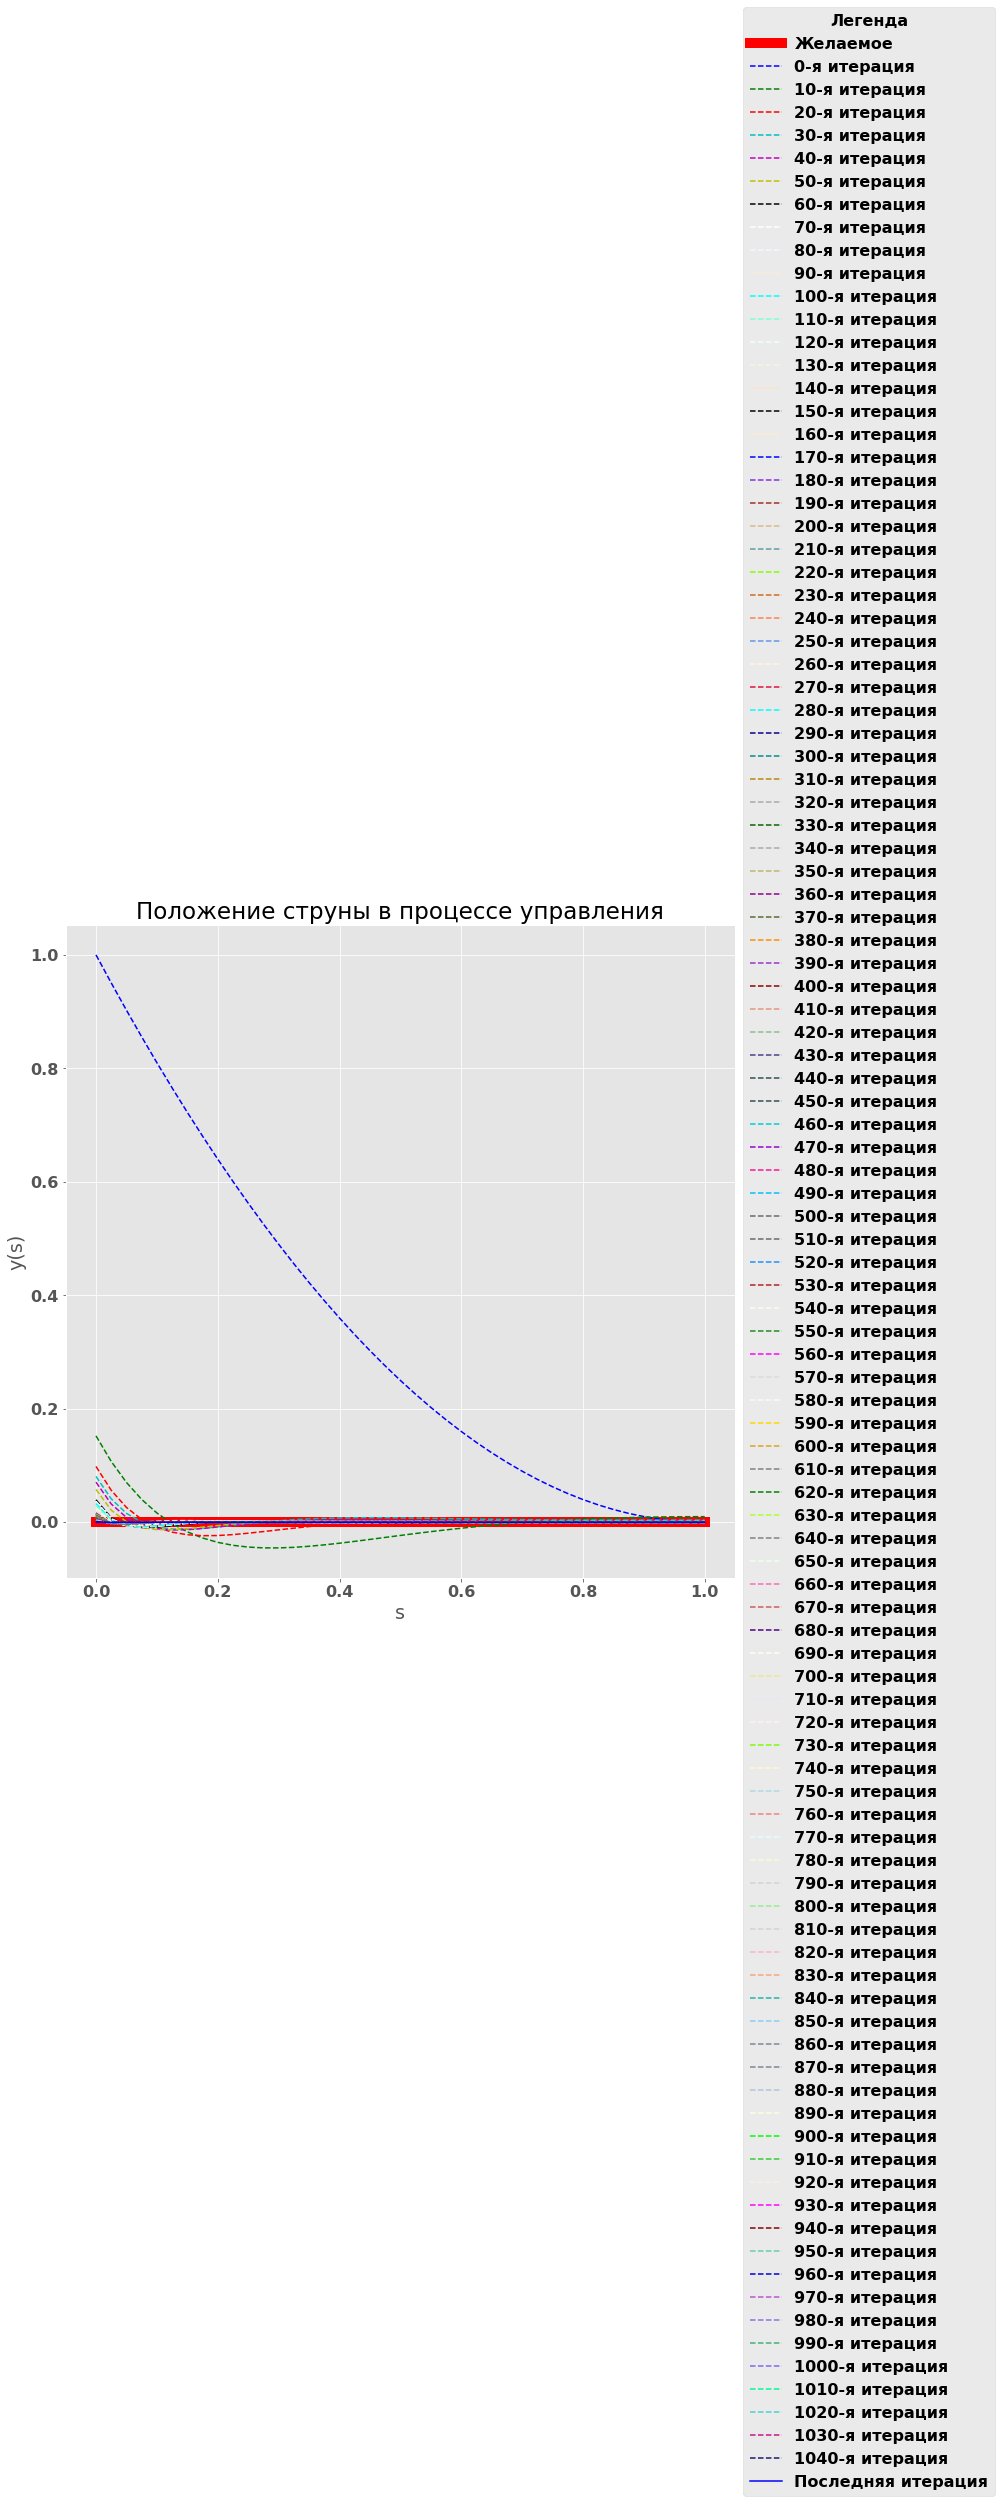

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', linewidth=10., label='Желаемое')
part = 1
count = 100
step = int(model.final_step / count / part)
if step != 0:
    for i in range(0, int(model.final_step / part), step):
        ax.plot(X_, model.x_arr[i][-1,:], color=colors[int(i / step)], linestyle='--', label='{}-я итерация'.format(i))
    ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
    plt.xlabel('s')
    plt.ylabel('y(s)')
    plt.title('Положение струны в процессе управления')
    plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
else:
    ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Последняя итерация')
    plt.xlabel('s')
    plt.ylabel('y(s)')
    plt.title('Положение струны в процессе управления')
    plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# Желаемое и полученное положение струны

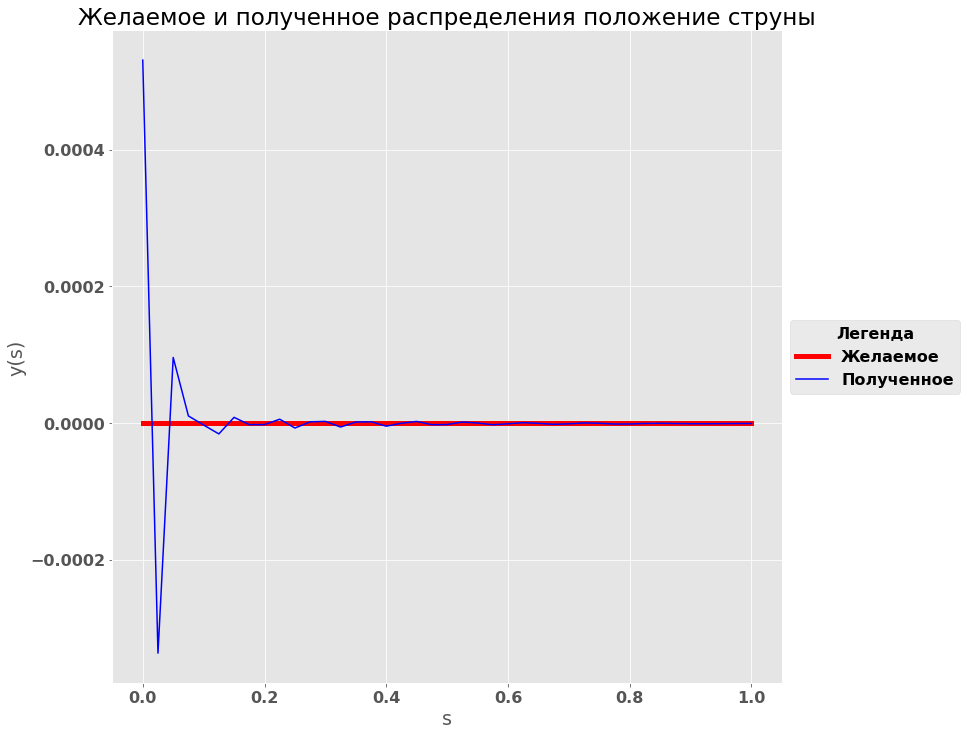

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_, y_s, color='r', linewidth=5., label='Желаемое')
ax.plot(X_, model.x_arr[-1][-1,:], color='b', label='Полученное')
#ax.set_ylim(bounds)
plt.xlabel('s')
plt.ylabel('y(s)')
plt.title('Желаемое и полученное распределения положение струны')
plt.legend(title='Легенда', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

---
# График изменения ошибки

(9.9623221132887345e-09, 0.10000000996232213)

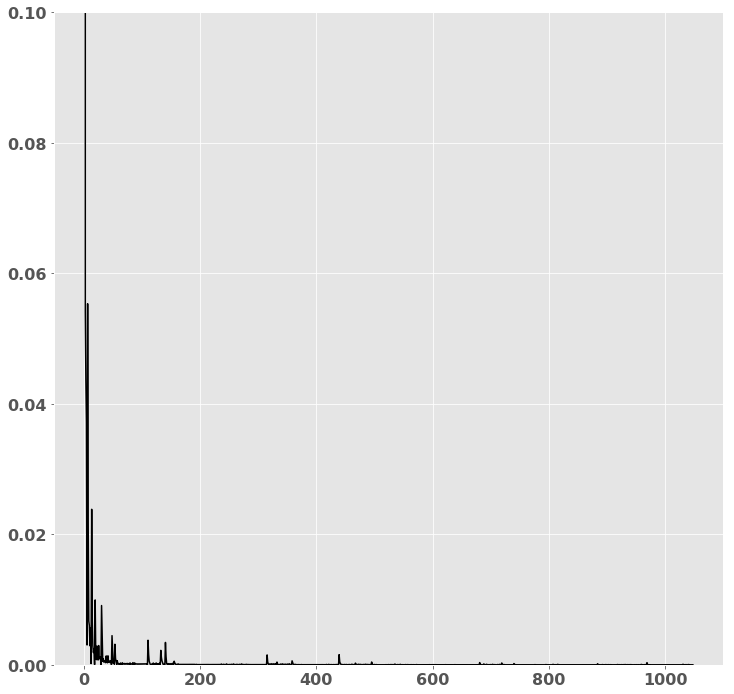

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(model.err, color='black', label='Ошибка')
ax.set_ylim([min(model.err), min(model.err) + .1])

---
# Управление

In [15]:
X_ = np.arange(0., p_d['l'] + p_d['dh'] / 4., p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'] / 4., p_d['dt'])
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(41, 41) (41, 41)


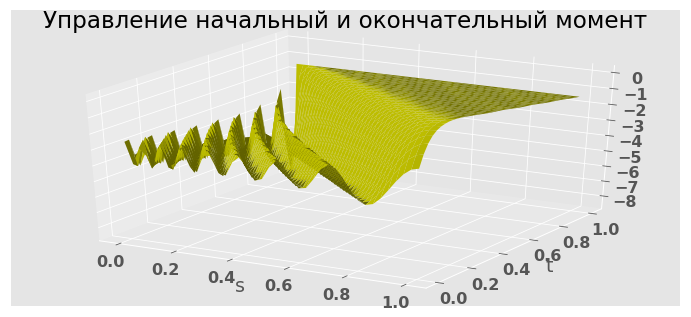

In [16]:
Z = model.f_arr[-1]

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')
plt.title('Управление начальный и окончательный момент')
plt.show()

---
# Решение второстепенной задачи

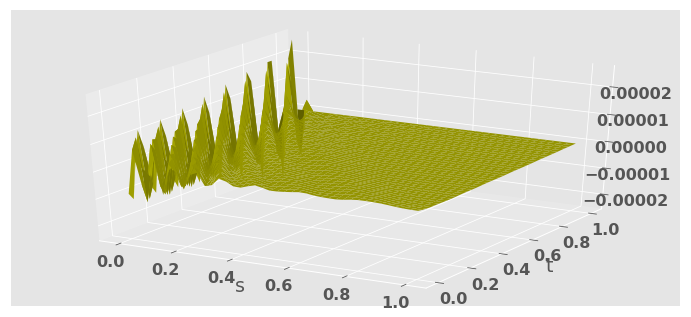

In [17]:
Z = model.psi_arr[-1]

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')

plt.show()